In [31]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

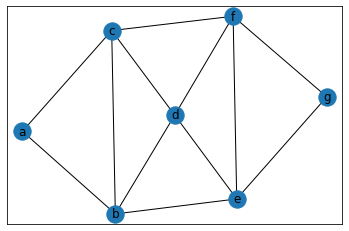

In [37]:
g = nx.Graph()
g.add_nodes_from(['a','b','c','d','e','f','g'])
g.add_edges_from([('a','b'),('a','c'),('b','c'),('b','d'),('b','e'),('e','d'),('e','g'),('e','f'),('g','f'),('f','d'),('f','c'),('c','d')])
nx.draw_networkx(g)
plt.savefig("test.png")
plt.show()

In [42]:
A=nx.adjacency_matrix(g) # using function adjacency_matrix to get adj matrix of above graph
B = A.todense()
G = np.array(B) # converting adj matrix to numpy array for easier calculation
print(G)

[[0 1 1 0 0 0 0]
 [1 0 1 1 1 0 0]
 [1 1 0 1 0 1 0]
 [0 1 1 0 1 1 0]
 [0 1 0 1 0 1 1]
 [0 0 1 1 1 0 1]
 [0 0 0 0 1 1 0]]


In [43]:
# creating a nodes dictionary 
node = np.array(g.nodes)
nodeDict={}
for i in range(len(G)):
    nodeDict[node[i]] = i
print("Node Dictionary : {}\n".format(nodeDict))


# count degree of all node.
# so here we r adding all the coloum of adjcent matrix for each row 
# For example for row 1 which is 'a' node sum of column element will be 2 which is equals to the degree of node 'a' 
degree =[]
for i in range(len(G)):
    degree.append(sum(G[i]))
print("Degrees : {}\n".format(degree))
    

# So here we r assigning 7 colours to all the nodes 
colorDict = {}
for i in range(len(G)):
    colorDict[node[i]]=["Blue","Red","Yellow","Green", "White","Pink", "Black"]
print("Color Dictionary : ")
colorDict

Node Dictionary : {'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4, 'f': 5, 'g': 6}

Degrees : [2, 4, 4, 4, 4, 4, 2]

Color Dictionary : 


{'a': ['Blue', 'Red', 'Yellow', 'Green', 'White', 'Pink', 'Black'],
 'b': ['Blue', 'Red', 'Yellow', 'Green', 'White', 'Pink', 'Black'],
 'c': ['Blue', 'Red', 'Yellow', 'Green', 'White', 'Pink', 'Black'],
 'd': ['Blue', 'Red', 'Yellow', 'Green', 'White', 'Pink', 'Black'],
 'e': ['Blue', 'Red', 'Yellow', 'Green', 'White', 'Pink', 'Black'],
 'f': ['Blue', 'Red', 'Yellow', 'Green', 'White', 'Pink', 'Black'],
 'g': ['Blue', 'Red', 'Yellow', 'Green', 'White', 'Pink', 'Black']}

In [44]:
sortedNode=[]
index = []

#Here we r using selection sort for arranging the nodes in decreasing order w.r.t to degree
for i in range(len(degree)):
    max1 = 0
    j = 0
    for j in range(len(degree)):
        if j not in index:
            if degree[j] > max1:
                max1 = degree[j]
                idx = j
    index.append(idx)
    sortedNode.append(node[idx])
    
print("Sorted nodes are : {}\n".format(sortedNode))
print("index of sorted nodes are :{}".format(index))

Sorted nodes are : ['b', 'c', 'd', 'e', 'f', 'a', 'g']

index of sorted nodes are :[1, 2, 3, 4, 5, 0, 6]


In [45]:
theSolution={} # creating dictionary for solution

for n in sortedNode:
    setTheColor = colorDict[n]
#     print(setTheColor)
    theSolution[n] = setTheColor[0]
#     print(theSolution[n])
    adjacentNode = G[nodeDict[n]]
#     print(G[t_[n]])
    for j in range(len(adjacentNode)):
        if adjacentNode[j]==1 and (setTheColor[0] in colorDict[node[j]]):
            colorDict[node[j]].remove(setTheColor[0]) # we r removing all the common color from colordict and storing in the solution dictionary
#     print("\n")

In [46]:
color_map=[]
for t,w in sorted(theSolution.items()):
  color_map.append(w)

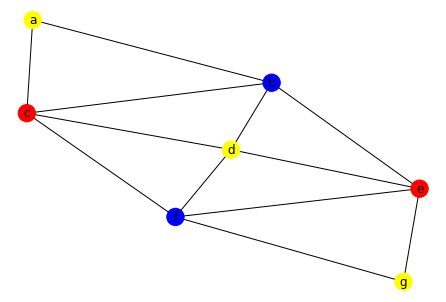

In [70]:
nx.draw(g, node_color=color_map, with_labels=True)
plt.show()